# CAPAG

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [2]:
# importacao CAPAG dez/2020
c2020 = pd.read_csv('/Users/daianeklein/Documents/Mackenzie/TAC/Data/CAPAG/CAPAG-Municipios-Dez2020.csv', sep = ';')
c2020 = c2020[['Cod.IBGE', 'UF', 'Classificação da CAPAG']]
c2020 = c2020[c2020['Classificação da CAPAG'] != 'n.d.']
c2020 = c2020.rename(columns = ({'Cod.IBGE' : 'cod',
                                'Classificação da CAPAG' : 'capag'}))
c2020['data'] = '01-12-2020'

In [3]:
# importacao CAPAG abr/2021
c2021 = pd.read_excel('/Users/daianeklein/Documents/Mackenzie/TAC/Data/CAPAG/CAPAGMunicipios-Abr2021.xlsx', engine = 'openpyxl' )
c2021 = c2021[['Cod.IBGE', 'CAPAG_Oficial']]
c2021 = c2021[c2021['CAPAG_Oficial'] != 'n.d.']

c2021 = c2021.rename(columns = ({'Cod.IBGE' : 'cod',
                                'CAPAG_Oficial' : 'capag'}))

c2021['data'] = '01-04-2021'

In [4]:
# merge nos dois dataframes
capag = c2020.merge(c2021, how = 'inner', on = 'cod')

# renomeando as colunas
cols = ['cod_ibge', 'uf', 'capag_2020', 'data_2020', 'capag_2021', 'data_2021']
capag.columns = cols

In [5]:
# resultado final
capag.head()

,cod_ibge,uf,capag_2020,data_2020,capag_2021,data_2021
0,5200050,GO,B,01-12-2020,A,01-04-2021
1,3100104,MG,B,01-12-2020,A,01-04-2021
2,5200100,GO,C,01-12-2020,C,01-04-2021
3,3100203,MG,B,01-12-2020,A,01-04-2021
4,1500107,PA,C,01-12-2020,C,01-04-2021


In [6]:
capag.shape

(3668, 6)

In [7]:
3668 / 5570

0.6585278276481149

# DATA ANALYSIS

In [8]:
pd.DataFrame(capag['capag_2020'].value_counts(normalize = True) * 100)

,capag_2020
C,61.177754
B,20.910578
A,17.611778
D,0.299891


In [9]:
pd.DataFrame(capag['capag_2021'].value_counts(normalize = True) * 100)

,capag_2021
C,50.490731
A,28.353326
B,20.992366
D,0.163577


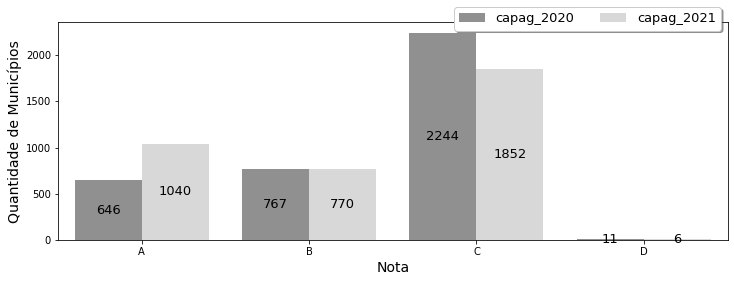

In [10]:
def plotar_grafico():
    palette = sns.set_palette(['#909090', '#D8D8D8'])
    
    aux = capag[['cod_ibge', 'capag_2020', 'capag_2021']]
    aux = pd.melt(aux, id_vars = 'cod_ibge')
    aux = aux.groupby(['variable', 'value'], as_index = False).count()
    
    plt.figure(figsize = (12, 4))
    ax = sns.barplot(data = aux, x = 'value', y = 'cod_ibge',hue = 'variable',  palette = palette);
    plt.bar_label(ax.containers[0], label_type='center', color = 'black', fontsize = 13,  fmt='%.0f');
    plt.bar_label(ax.containers[1], label_type='center', color = 'black', fontsize = 13,  fmt='%.0f');
    ax.legend(loc = 'upper right', bbox_to_anchor =(1, 1.10), ncol = 3, fancybox = True, shadow = True, 
                  fontsize = 13);
    plt.ylabel('Quantidade de Municípios', fontsize = 14);
    plt.xlabel('Nota', fontsize = 14);

plotar_grafico()

# CAPAG x SICONFI

In [11]:
siconfi = pd.read_csv('/Users/daianeklein/Documents/Mackenzie/TAC/Data/SICONFI/finbra.csv', encoding = 'latin-1',
                skiprows = 3,error_bad_lines=False, warn_bad_lines = False, sep = ';', decimal = ',', thousands = '.')

/Users/daianeklein/miniconda3/envs/ds-projects/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3441: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/daianeklein/miniconda3/envs/ds-projects/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3441: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [12]:
# importacao CAPAG abr/2021
capag = pd.read_excel('/Users/daianeklein/Documents/Mackenzie/TAC/Data/CAPAG/CAPAGMunicipios-Abr2021.xlsx', engine = 'openpyxl' )
capag = capag[['Cod.IBGE', 'CAPAG_Oficial', 'População']]
capag = capag[capag['CAPAG_Oficial'] != 'n.d.']

capag = capag.rename(columns = ({'CAPAG_Oficial' : 'capag'}))



In [13]:
siconfi = siconfi[siconfi['Coluna'] == 'Despesas Pagas']
siconfi = siconfi[siconfi['Conta'] == '12 - Educação']
siconfi = siconfi[['Cod.IBGE', 'Valor']]

siconfi = siconfi.rename(columns = ({'Valor' : 'siconfi'}))

In [14]:
df = capag.merge(siconfi, how = 'inner', on ='Cod.IBGE')
df.head()

,Cod.IBGE,capag,População,siconfi
0,5200050,A,8773.0,1.415498e+07
1,3100104,A,6989.0,5.365913e+06
2,5200100,C,20042.0,9.279337e+06
3,3100203,A,23237.0,1.092761e+07
4,1500107,C,156292.0,1.120977e+08


In [15]:
df['invest_medio'] = df[['População', 'siconfi']].apply(lambda x: round(x['siconfi'] / x['População'], 0), axis = 1)



# SAEB

In [16]:
saeb = pd.read_csv('/Users/daianeklein/Documents/Mackenzie/TAC/Data/SAEB/microdados_saeb_2015/PLANILHAS DE RESULTADOS/saeb.csv',
                  sep = ';')


In [17]:
saeb['saeb'] = saeb[['LP', 'MT']].apply(lambda x: round((x['LP'] + x['MT']) / 2, 0), axis = 1)
saeb = saeb.rename(columns = ({'CO_MUNICIPIO' : 'Cod.IBGE'}))

In [18]:
df = df.merge(saeb[['Cod.IBGE', 'saeb']], how = 'inner', on = 'Cod.IBGE')

In [19]:
capag_dict = {'A' : 1,
             'B' : 2,
             'C' : 3,
             'D' : 4}

df['capag'] = df['capag'].map(capag_dict)

In [20]:
capag_dict = {1:'A',
             2:'B',
             3:'C' ,
             4:'D' }

df['capag'] = df['capag'].map(capag_dict)

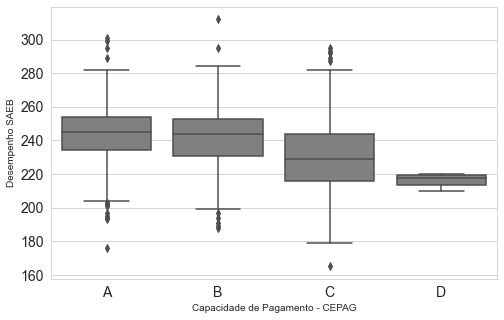

In [21]:
plt.figure(figsize = (8, 5))

sns.set_style("whitegrid")
order = ['A', 'B', 'C', 'D']
sns.boxplot(data = df, x = 'capag', y = 'saeb', color = 'grey', order = order);
plt.xticks(fontsize = 14);
plt.yticks(fontsize = 14);
plt.ylabel('Desempenho SAEB');
plt.xlabel('Capacidade de Pagamento - CEPAG');

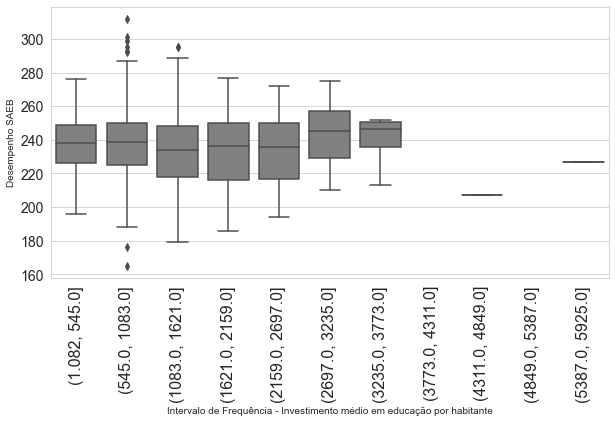

In [22]:
#tabela de frequência
tamanho = len(df['invest_medio']) /3
k = int((1 + ((10/3) * np.log10(tamanho))))
df['classe_invest_medio'] = pd.cut( x = df['invest_medio'], bins = k, include_lowest= False)

df = df.sort_values(by='classe_invest_medio')

plt.figure(figsize = (10, 5))

sns.set_style("whitegrid")
sns.boxplot(data = df, x = 'classe_invest_medio', y = 'saeb', color = 'grey');
plt.xticks(rotation = 90, fontsize = 16);
plt.xlabel('Intervalo de Frequência - Investimento médio em educação por habitante')
plt.ylabel('Desempenho SAEB')
plt.yticks(fontsize = 14);


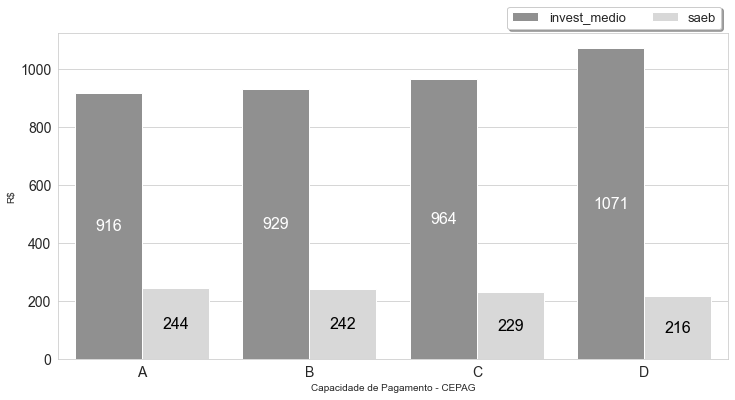

In [23]:
df2 = df[['capag', 'invest_medio', 'saeb']]
plt.figure(figsize=(12, 6));
palette = sns.set_palette(['#909090', '#D8D8D8'])

order = ['A', 'B', 'C', 'D']
ax = sns.barplot(data = df2.melt(id_vars = 'capag'), x = 'capag', y = 'value',hue = 'variable',
           ci = False, order = order, palette = palette);

plt.bar_label(ax.containers[0], label_type='center', color = 'white', fontsize = 16,  fmt='%.0f');
plt.bar_label(ax.containers[1], label_type='center', color = 'black', fontsize = 16,  fmt='%.0f');
ax.legend(loc = 'upper right', bbox_to_anchor =(1, 1.10), ncol = 3, fancybox = True, shadow = True, 
                  fontsize = 13);
plt.xticks(fontsize = 14);
plt.yticks(fontsize = 14);
plt.ylabel('R$');
plt.xlabel('Capacidade de Pagamento - CEPAG');


# SAEB

In [24]:
ss = pd.read_excel('/Users/daianeklein/Documents/Mackenzie/TAC/Data/SAEB/microdados_saeb_2019/PLANILHAS DE RESULTADOS/TS_MUNICIPIO.xlsx',
                    engine = 'openpyxl')


In [25]:
ss = ss[['CO_MUNICIPIO','MEDIA_5_LP', 'MEDIA_5_MT','MEDIA_9_LP', 'MEDIA_9_MT']]

ss['LP'] = round((ss['MEDIA_5_LP'] + ss['MEDIA_9_LP']) / 2, 0)
ss['MT'] = round((ss['MEDIA_5_MT'] + ss['MEDIA_9_MT']) / 2, 0)

ss = ss[['CO_MUNICIPIO', 'LP', 'MT']]

ss = ss.groupby('CO_MUNICIPIO', as_index = False).mean()

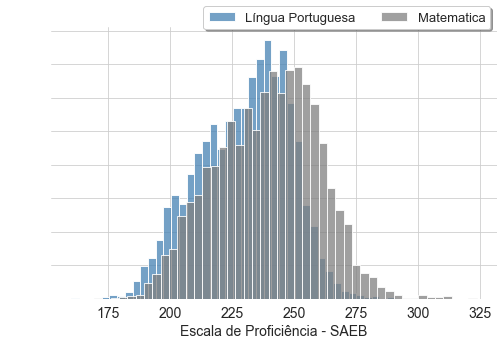

In [26]:
palette = sns.set_palette(['#4682B4','#D8D8D8'])

plt.figure(figsize = (8, 5))
ax = sns.histplot(data = ss, x = 'LP', label = 'Língua Portuguesa');
sns.histplot(data = ss, x = 'MT', color = 'grey', label = 'Matematica', palette = palette);

plt.legend()
sns.despine(bottom = True, left = True);
plt.xlabel('Escala de Proficiência - SAEB', fontsize = 14);
ax.legend(loc = 'upper right', bbox_to_anchor =(1, 1.10), ncol = 3, fancybox = True, shadow = True, 
                  fontsize = 13);
plt.xticks(fontsize = 14);
plt.yticks(fontsize = 14, color = 'white');
plt.ylabel([], color = 'white');


# SICONFI

In [27]:
siconfi = pd.read_csv('/Users/daianeklein/Documents/Mackenzie/TAC/Data/SICONFI/finbra.csv', encoding = 'latin-1',
                skiprows = 3,error_bad_lines=False, warn_bad_lines = False, sep = ';', decimal = ',', thousands = '.')

/Users/daianeklein/miniconda3/envs/ds-projects/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3441: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/daianeklein/miniconda3/envs/ds-projects/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3441: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [28]:
# def plotar_grafico():
#     sns.set_style("whitegrid")
#     #palette = sns.set_palette(['#D8D8D8'])
    
#     plt.figure(figsize = (12, 3))
#     aux = pd.DataFrame(siconfi[['2020', '2019', '2018', '2017']].sum()).reset_index().rename(columns={0 : 'total'}).sort_values(by='index')
#     aux['total'] = aux['total'] / 1000000
    
#     plt.figure(figsize = (15, 5));
#     ax = sns.lineplot(data = aux, x = 'index', y = 'total', color = 'dimgrey', linewidth = 1.5, marker = 'o');
#     plt.ylabel('R$ - Em milhões',  fontsize = 13);
#     plt.xlabel('Ano', fontsize = 13);
#     plt.xticks( fontsize = 13)
#     plt.yticks( fontsize = 13)
#     plt.grid(False)



# plotar_grafico()



In [29]:
siconfi = siconfi[siconfi['Coluna'] == 'Despesas Pagas']
siconfi = siconfi[siconfi['Conta'] == '12 - Educação']
siconfi = siconfi[['Cod.IBGE', 'Valor']]

siconfi = siconfi.rename(columns = ({'Valor' : 'siconfi'}))

# MERGE DATAFRAME

In [32]:
cols = ['cod', 'capag','pop']
capag.columns = cols

siconfi = siconfi[['Cod.IBGE', 'siconfi']]
cols = ['cod', 'siconfi']
siconfi.columns = cols

ss['saeb'] = round((ss['LP'] + ss['MT']) / 2, 2)
ss = ss[['CO_MUNICIPIO', 'saeb']]

cols = ['cod', 'saeb']
ss.columns = cols

In [33]:
df = capag.merge(ss, how = 'inner', on = 'cod')
df = df.merge(siconfi, on = 'cod', how = 'inner')

df.head()

,cod,capag,pop,saeb,siconfi
0,5200050,A,8773.0,236.31,1.415498e+07
1,3100104,A,6989.0,264.25,5.365913e+06
2,5200100,C,20042.0,226.50,9.279337e+06
3,3100203,A,23237.0,261.20,1.092761e+07
4,1500107,C,156292.0,203.17,1.120977e+08


In [34]:
saeb_mean = df['saeb'].mean()
df['saeb'] = df['saeb'].fillna(saeb_mean)

In [35]:
capag_dict = {'A' : 1,
             'B' : 2,
             'C' : 3,
             'D' : 4}

df['capag'] = df['capag'].map(capag_dict)

In [36]:
df.head()

,cod,capag,pop,saeb,siconfi
0,5200050,1,8773.0,236.31,1.415498e+07
1,3100104,1,6989.0,264.25,5.365913e+06
2,5200100,3,20042.0,226.50,9.279337e+06
3,3100203,1,23237.0,261.20,1.092761e+07
4,1500107,3,156292.0,203.17,1.120977e+08


<AxesSubplot:xlabel='pop', ylabel='saeb'>

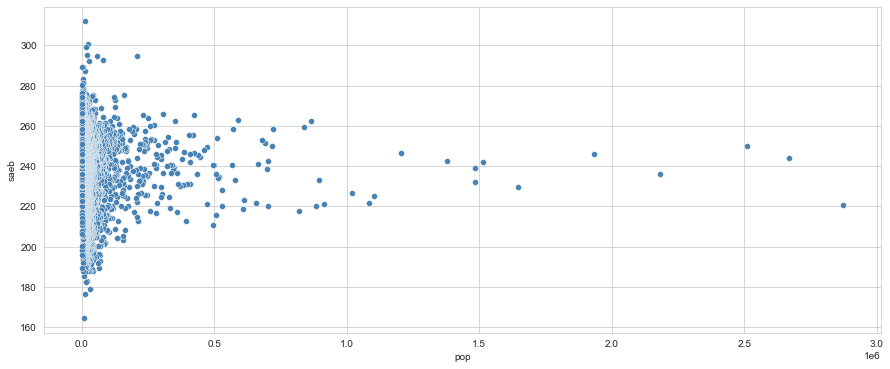

In [37]:
plt.figure(figsize = (15, 6))
sns.scatterplot(data = df.sort_values(by='pop', ascending = False)[2:], 
                x = 'pop', y = 'saeb')

<AxesSubplot:xlabel='pop', ylabel='siconfi'>

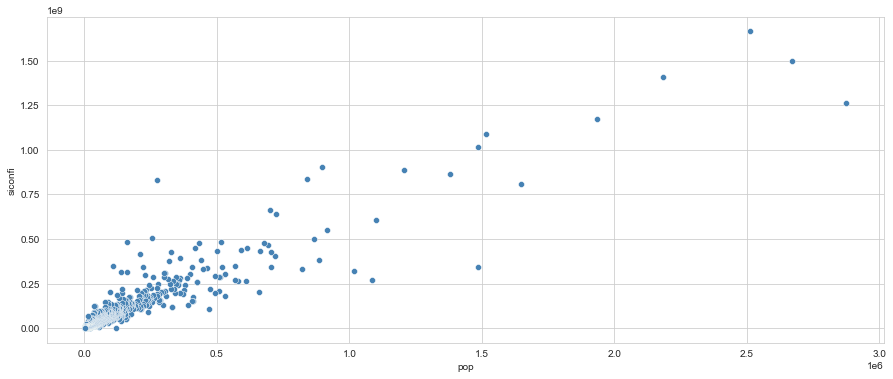

In [38]:
plt.figure(figsize = (15, 6))
sns.scatterplot(data = df.sort_values(by='pop', ascending = False)[2:], 
                x = 'pop', y = 'siconfi')

<AxesSubplot:xlabel='saeb', ylabel='siconfi'>

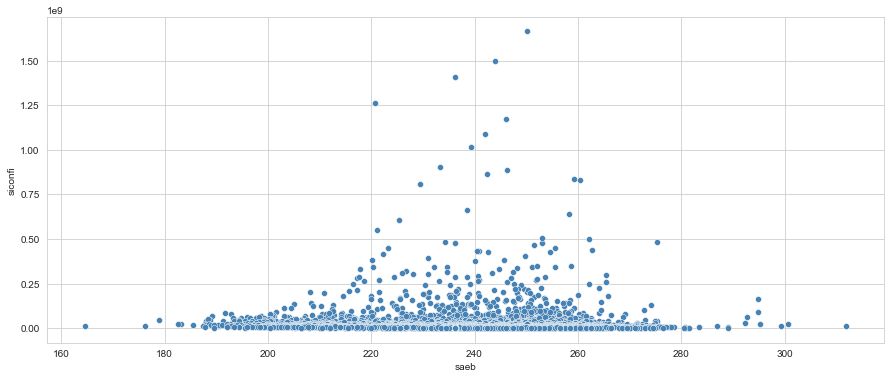

In [39]:
plt.figure(figsize = (15, 6))
sns.scatterplot(data = df.sort_values(by='pop', ascending = False)[2:], 
                x = 'saeb', y = 'siconfi')

In [40]:
df.head(10)

,cod,capag,pop,saeb,siconfi
0,5200050,1,8773.0,236.31,1.415498e+07
1,3100104,1,6989.0,264.25,5.365913e+06
2,5200100,3,20042.0,226.50,9.279337e+06
3,3100203,1,23237.0,261.20,1.092761e+07
4,1500107,3,156292.0,203.17,1.120977e+08
5,4100103,3,7457.0,242.00,5.184372e+06
6,4200101,1,17904.0,233.50,1.853766e+07
7,3100302,2,13465.0,255.19,6.479325e+06
8,2600054,2,99990.0,220.75,3.972115e+07
9,1700251,3,2579.0,224.00,3.890043e+06


# NOME MUNICÍPIO

In [41]:
mun_nome = pd.read_csv('/Users/daianeklein/Documents/Mackenzie/TAC/Data/CAPAG/CAPAGMunicipios-Abr2021 - capag.csv',
                  sep = ',')
mun_nome

,Município,Cod.IBGE,UF,População,Indicador_1,Nota_1,Indicador_2,Nota_2,Indicador_3,Nota_3,Classificação_CAPAG,Indicador_1_Revisão,Nota_1_Revisão,Indicador_2_Revisão,Nota_2_Revisão,Indicador_3_Revisão,Nota_3_Revisão,CAPAG_Revisão,CAPAG_Oficial
0,Abadia de Goiás - GO,5200050,GO,8773.0,"0,08136333952",A,"0,8925147231",A,"0,5414703005",A,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A
1,Abadia dos Dourados - MG,3100104,MG,6989.0,"0,1272324734",A,"0,8836729333",A,"0,1616611162",A,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A
2,Abadiânia - GO,5200100,GO,20042.0,"0,1885726696",A,"0,9466140559",B,"2,226205681",C,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C
3,Abaeté - MG,3100203,MG,23237.0,"0,2562741189",A,"0,828040757",A,"0,1769593174",A,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A
4,Abaetetuba - PA,1500107,PA,156292.0,"0,03198608574",A,"0,9611953318",C,"0,8821596457",A,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5564,Xique Xique - BA,2933604,BA,46483.0,"0,4301684006",A,"0,990211312",C,"0,4941936329",A,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C
5565,Zabelê - PB,2517407,PB,2240.0,"0,008101754085",A,"1,000337814",C,"0,01150917292",A,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C
5566,Zacarias - SP,3557154,SP,2718.0,0,A,"0,8480750044",A,"0,001591069585",A,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A
5567,Zé Doca - MA,2114007,MA,51714.0,"0,1733912759",A,"0,8533879506",A,"-2,709549317",C,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C


In [42]:
mun_nome = mun_nome.iloc[:, :2]
mun_nome = mun_nome[['Cod.IBGE', 'Município']]

In [43]:
mun_nome['uf'] = mun_nome['Município'].str.split('-').str[1]

In [44]:
for i, j in zip(mun_nome['uf'], mun_nome.index):
    t = len(i)
    if t > 3:
        print(j, mun_nome.iloc[j]['Município'])
        

cols = ['cod', 'municipio', 'uf']
mun_nome.columns = cols

In [45]:
df = df.merge(mun_nome, on = 'cod', how = 'inner')
df = df[['cod', 'municipio', 'uf', 'capag', 'pop', 'saeb', 'siconfi']]

df.head()

,cod,municipio,uf,capag,pop,saeb,siconfi
0,5200050,Abadia de Goiás - GO,GO,1,8773.0,236.31,1.415498e+07
1,3100104,Abadia dos Dourados - MG,MG,1,6989.0,264.25,5.365913e+06
2,5200100,Abadiânia - GO,GO,3,20042.0,226.50,9.279337e+06
3,3100203,Abaeté - MG,MG,1,23237.0,261.20,1.092761e+07
4,1500107,Abaetetuba - PA,PA,3,156292.0,203.17,1.120977e+08


In [46]:
df['siconfi_medio'] = df[['pop', 'siconfi']].apply(lambda x: round(x['siconfi'] / x['pop'], 0), axis = 1)

df.head()

,cod,municipio,uf,capag,pop,saeb,siconfi,siconfi_medio
0,5200050,Abadia de Goiás - GO,GO,1,8773.0,236.31,1.415498e+07,1613.0
1,3100104,Abadia dos Dourados - MG,MG,1,6989.0,264.25,5.365913e+06,768.0
2,5200100,Abadiânia - GO,GO,3,20042.0,226.50,9.279337e+06,463.0
3,3100203,Abaeté - MG,MG,1,23237.0,261.20,1.092761e+07,470.0
4,1500107,Abaetetuba - PA,PA,3,156292.0,203.17,1.120977e+08,717.0


In [47]:
df.shape

(4362, 8)

## CAPAG ALTO

In [48]:
# Somente capacidade de pagamento A e B (1 e 2)
pot_mun = df[(df['capag'] == 1) | (df['capag'] == 2)]
pot_mun.head()

,cod,municipio,uf,capag,pop,saeb,siconfi,siconfi_medio
0,5200050,Abadia de Goiás - GO,GO,1,8773.0,236.31,14154979.45,1613.0
1,3100104,Abadia dos Dourados - MG,MG,1,6989.0,264.25,5365912.81,768.0
3,3100203,Abaeté - MG,MG,1,23237.0,261.20,10927614.06,470.0
6,4200101,Abelardo Luz - SC,SC,1,17904.0,233.50,18537661.15,1035.0
7,3100302,Abre Campo - MG,MG,2,13465.0,255.19,6479325.19,481.0


In [49]:
pot_mun.shape

(2180, 8)

In [50]:
pot_mun['siconfi_medio'].min()

7.0

In [51]:
pot_mun['siconfi_medio'].max()

5925.0

<AxesSubplot:>

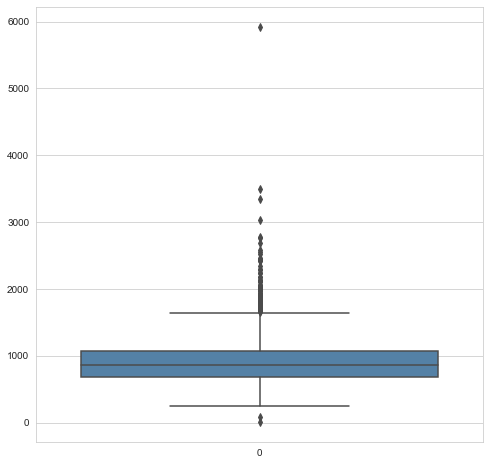

In [52]:
plt.figure(figsize = (8, 8))
sns.boxplot(data = pot_mun['siconfi_medio'])

In [53]:
def remove_outlier():
    q1 = pot_mun['siconfi_medio'].quantile(0.25)
    q3 = pot_mun['siconfi_medio'].quantile(0.75)
    iqr = q3-q1 #interquartil
    f_low  = q1-1.5*iqr
    f_high = q3+1.5*iqr
    df_out = pot_mun.loc[(pot_mun['siconfi_medio'] > f_low) & (pot_mun['siconfi_medio'] < f_high)]
    return df_out

In [58]:
pot_mun = pot_mun[pot_mun['siconfi_medio'] < 2697]

In [68]:
remove_outlier()

,cod,municipio,uf,capag,pop,saeb,siconfi,siconfi_medio
0,5200050,Abadia de Goiás - GO,GO,1,8773.0,236.31,14154979.45,1613.0
1,3100104,Abadia dos Dourados - MG,MG,1,6989.0,264.25,5365912.81,768.0
3,3100203,Abaeté - MG,MG,1,23237.0,261.20,10927614.06,470.0
6,4200101,Abelardo Luz - SC,SC,1,17904.0,233.50,18537661.15,1035.0
7,3100302,Abre Campo - MG,MG,2,13465.0,255.19,6479325.19,481.0
...,...,...,...,...,...,...,...,...
4349,4128807,Xambrê - PR,PR,1,5679.0,252.50,3808658.07,671.0
4351,4219507,Xanxerê - SC,SC,1,50982.0,253.90,31645766.78,621.0
4353,4219606,Xavantina - SC,SC,1,3933.0,255.33,2642394.00,672.0
4354,4219705,Xaxim - SC,SC,1,28706.0,259.38,30039670.89,1046.0


In [69]:
remove_outlier().shape

(2103, 8)

In [70]:
remove_outlier()['saeb'].mean()

242.69555333008014

In [71]:
remove_outlier()[remove_outlier()['saeb'] < remove_outlier()['saeb'].mean()]

,cod,municipio,uf,capag,pop,saeb,siconfi,siconfi_medio
0,5200050,Abadia de Goiás - GO,GO,1,8773.0,236.310000,1.415498e+07,1613.0
6,4200101,Abelardo Luz - SC,SC,1,17904.0,233.500000,1.853766e+07,1035.0
8,2600054,Abreu e Lima - PE,PE,2,99990.0,220.750000,3.972115e+07,397.0
20,4100202,Adrianópolis - PR,PR,1,5983.0,221.750000,5.923917e+06,990.0
31,5100201,Água Boa - MT,MT,1,25721.0,235.750000,2.327587e+07,905.0
...,...,...,...,...,...,...,...,...
4329,3205309,Vitória - ES,ES,1,362097.0,231.000000,3.919977e+08,1083.0
4331,2933307,Vitória da Conquista - BA,BA,2,338480.0,236.790000,2.220575e+08,656.0
4332,4323754,Vitória das Missões - RS,RS,1,3133.0,236.162763,3.154293e+06,1007.0
4337,3172103,Volta Grande - MG,MG,2,5252.0,231.500000,4.772811e+06,909.0


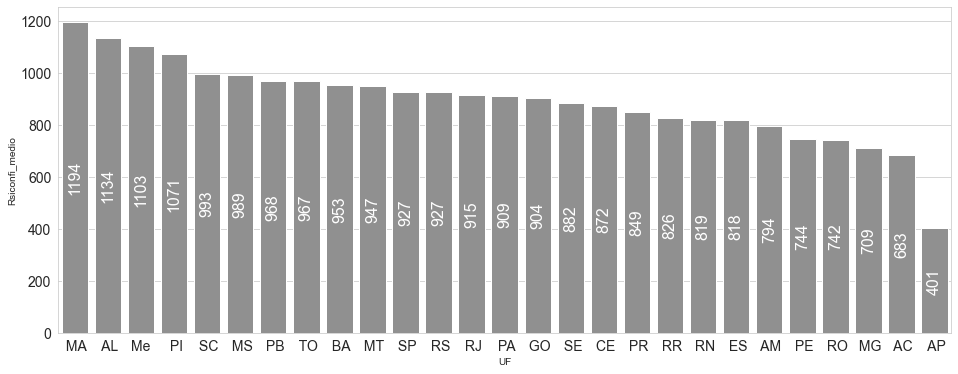

In [83]:
plt.figure(figsize=(16, 6));
palette = sns.set_palette(['#909090', '#D8D8D8'])

order = remove_outlier().groupby('uf')['siconfi_medio'].mean().sort_values(ascending = False).index
ax = sns.barplot(data = remove_outlier(), x = 'uf', y = 'siconfi_medio',
           ci = False,  color = '#909090', order = order);

plt.bar_label(ax.containers[0], label_type='center', color = 'white', fontsize = 16,  fmt='%.0f', rotation = 90);
plt.xticks(fontsize = 14);
plt.yticks(fontsize = 14);
plt.ylabel('Rsiconfi_medio')
plt.xlabel('UF');


In [138]:
aux = remove_outlier().groupby('uf')['siconfi_medio'].mean().sort_values(ascending = False)[:5].index
aux

Index([' MA', ' AL', 'Me', ' PI', ' SC'], dtype='object', name='uf')

In [119]:
remove_outlier()[remove_outlier()['uf'] == ' MA'].sort_values(by='siconfi_medio')[:5]

,cod,municipio,uf,capag,pop,saeb,siconfi,siconfi_medio
3704,2111201,São José de Ribamar - MA,MA,2,177687.0,229.75,1.367752e+08,770.0
662,2102408,Cajapió - MA,MA,1,11177.0,176.25,1.010354e+07,904.0
3681,2111102,São João dos Patos - MA,MA,2,25929.0,231.50,2.517992e+07,971.0
350,2101400,Balsas - MA,MA,1,94887.0,216.00,9.356903e+07,986.0
3248,2109551,Ribamar Fiquene - MA,MA,2,7791.0,200.50,8.145054e+06,1045.0


In [139]:
def test():
    aux = remove_outlier().groupby('uf')['siconfi_medio'].mean().sort_values(ascending = False)[:5].index
    for i in aux:
        print(i)
        aux3 = remove_outlier()[remove_outlier()['uf'] == i].sort_values(by='siconfi_medio')[:5]
    return aux3

test()

 MA
 AL
Me
 PI
 SC


,cod,municipio,uf,capag,pop,saeb,siconfi,siconfi_medio
3103,4213609,Porto União - SC,SC,1,35398.0,231.790000,16085412.92,454.0
46,4200507,Águas de Chapecó - SC,SC,2,6486.0,236.162763,3408728.47,526.0
253,4201406,Araranguá - SC,SC,1,68228.0,243.500000,38723373.95,568.0
443,4202206,Benedito Novo - SC,SC,2,11526.0,238.750000,6585187.14,571.0
2775,4212205,Papanduva - SC,SC,1,19320.0,249.180000,11055287.08,572.0


IndexError: list index out of range

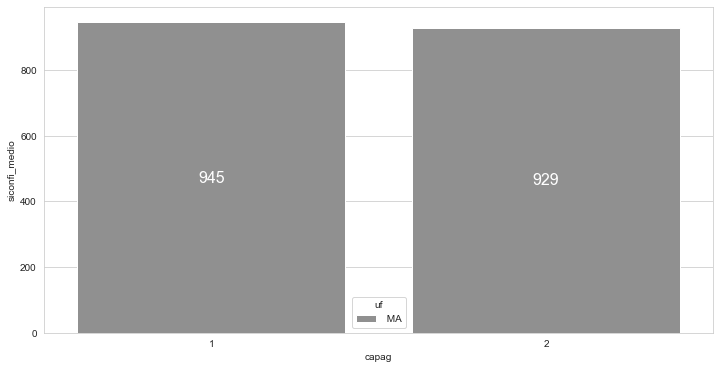

In [140]:
aux = remove_outlier().groupby('uf')['siconfi_medio'].mean().sort_values(ascending = False)[:5].index

for i in aux:
    aux1 = remove_outlier()[remove_outlier()['uf'] == i].sort_values(by='siconfi_medio')[:5]
    plt.figure(figsize=(12, 6));
    palette = sns.set_palette(['#909090', '#D8D8D8'])

    #order = ['A', 'B', 'C', 'D']
    ax = sns.barplot(data = aux1, x = 'capag', y = 'siconfi_medio',hue = 'uf',
               ci = False, palette = palette);

    plt.bar_label(ax.containers[0], label_type='center', color = 'white', fontsize = 16,  fmt='%.0f');
    plt.bar_label(ax.containers[1], label_type='center', color = 'black', fontsize = 16,  fmt='%.0f');
    ax.legend(loc = 'upper right', bbox_to_anchor =(1, 1.10), ncol = 3, fancybox = True, shadow = True, 
                      fontsize = 13);
    plt.xticks(fontsize = 14);
    plt.yticks(fontsize = 14);
    plt.ylabel('R$');
    plt.xlabel('Capacidade de Pagamento - CEPAG');
